# Visualizing Time Series Data in Python

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

## Autocorrelation, Partial Autocorrelation Plots & Seasonality, Trend and Noise Plots in Time Series Data

## Importing the required libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## Loading & Importing the Dataset

### Knowing the dataset

This time series dataset contains the CO2 measurements at the Mauna Loa Observatory, Hawaii between the years of 1958 and 2001.

### Importing the dataset

In [17]:
path = "/content/ch2_co2_levels.csv"

### Loading the dataset

In [18]:
df = pd.read_csv(path)

## Data Manipulations

Converting the dtype of datestamp column in the dataframe

In [19]:
df['datestamp'] = pd.to_datetime(df['datestamp'])

Setting the datestamp column as the index of the dataframe

In [20]:
df = df.set_index('datestamp')

We are filling the missing values in our dataset with bfill (backfilling) method.

In this method, missing values are replaced using the next valid observation in the dataset.

In [21]:
df.fillna(method='bfill', inplace=True)

Rechecking the dataframe

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2284 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


In [46]:
df.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


## Autocorrelation & Partial Autocorrelation

### Importing the library - Statsmodels

"Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration."

In [23]:
from statsmodels.graphics import tsaplots

### Autocorrelation on time series

**Autocorrelation is a measure of the correlation between the time series and a delayed copy of itself.** 

For example, an autocorrelation of order 3 returns the correlation between a time series at points t_1, t_2, t_3, and its own values lagged by 3 time points, i.e. t_4, t_5, t_6. 

Autocorrelation is used to find repeating patterns or periodic signals in time series data. 

The principle of autocorrelation can be applied to any signal, and not just time series. Therefore, it is common to encounter the same principle in other fields, where it is also sometimes referred to as **autocovariance**.

We can leverage the `.plot_acf()` function in statsmodels to measure and plot the autocorrelation of a time series. 

In the `.plot_acf()` function, the maximum number of lags to compute the autocorrelation values can be specified by using the `lags` parameter. In this case, we set the lags parameter value to 40.

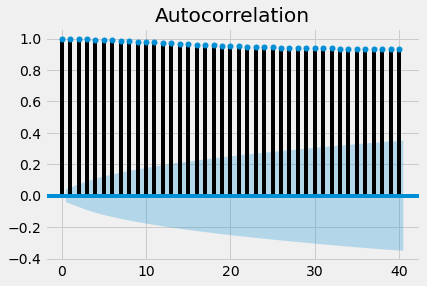

In [24]:
acf_plot = tsaplots.plot_acf(df['co2'], lags=40)
plt.show()

Because autocorrelation is a correlation measure, the autocorrelation coefficient can only take values between -1 and 1. An autocorrelation of 0 indicates no correlation, while -1 and 1 indicate strong negative and positive correlation.

In order to help to assess the significance of autocorrelation values, the `plot_acf()` function also computes and returns margins of uncertainty, which are represented in the graph as blue shaded regions. Values above these regions can be interpreted as the time series having a statistically significant relationship with a lagged version of itself.

### Partial Autocorrelation on time series

**The partial autocorrelation measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends this idea by also removing the effect of previous time points.**

For example, a partial autocorrelation function of order 3 returns the correlation between the time series at points t_1 , t_2 , t_3 ,and lagged values of itself by 3 time points t_4, t_5, t_6, but only after removing all effects attributable to lags 1 and 2.

Just like with autocorrelation, we need to use the statsmodels library to compute and plot the partial autocorrelation in a time series. This example uses the `plot_pacf()` function to calculate and plot the partial autocorrelation for the first 40 lags of the time series contained in the DataFrame.

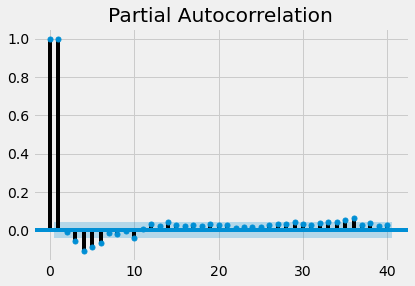

In [26]:
pacf_plot = tsaplots.plot_pacf(df['co2'],lags=40)
plt.show()

If partial autocorrelation values are close to 0, you can conclude that values are not correlated with one another. Inversely, partial autocorrelations that have values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series. 

If partial autocorrelation values are beyond the margins of uncertainty, which are marked by the blue shaded regions, then we can assume that the observed partial autocorrelation values are statistically significant.

## Properties of time series - Decomposition

In general, most time series can be decomposed in three major components. The first is **seasonality**, which describes the periodic signal in the time series. The second component is **trend**, which describes whether the time series is decreasing, constant or increasing over time. Finally, the third component is **noise (resid/ residuals)**, which describes the unexplained variance and volatility of the time series. 

Let's go through some concrete examples so that we get a better understanding of each of these components.

### Time Series Decomposition

To preform time series decomposition, we can leverage the statsmodels library, only this time we will rely on the statsmodels `.tsa` sub-module, which contains functions that are useful for time series analysis. 

The `sm.tsa.seasonal_decompose()` function can be used to apply time series decomposition out of the box.

Importing the library

In [27]:
import statsmodels.api as sm

Applying decomposition on time series

In [32]:
decomposition = sm.tsa.seasonal_decompose(df['co2'])

###Plot of time series decomposition on CO2 data

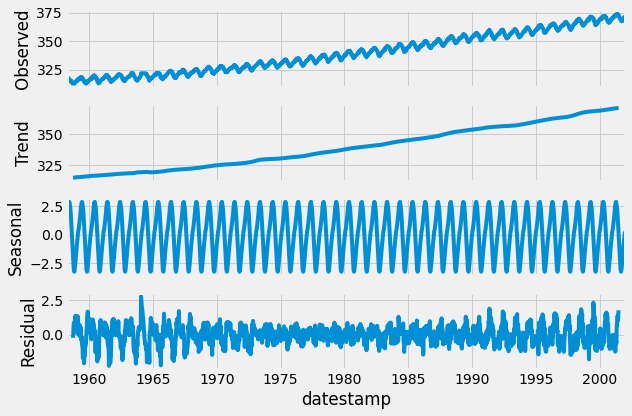

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

fig = decomposition.plot()
plt.show()

### Extracting components from time series decomposition
Additionally, it is easy to extract each individual component and plot them. As we can see here, we can use the `dir()` command to print out the attributes associated to the decomposition variable generated earlier.

In [41]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

To print the observed component, use `decomposition.observed`.

In [42]:
decomposition.observed

datestamp
1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Name: co2, Length: 2284, dtype: float64

To print the trend component, use `decomposition.trend`.

In [43]:
decomposition.trend

datestamp
1958-03-29   NaN
1958-04-05   NaN
1958-04-12   NaN
1958-04-19   NaN
1958-04-26   NaN
              ..
2001-12-01   NaN
2001-12-08   NaN
2001-12-15   NaN
2001-12-22   NaN
2001-12-29   NaN
Name: co2, Length: 2284, dtype: float64

To print the seasonal component, use `decomposition.seasonal`.

In [44]:
decomposition.seasonal

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: co2, Length: 2284, dtype: float64

To print the noise component, use `decomposition.noise`.

In [45]:
decomposition.resid

datestamp
1958-03-29   NaN
1958-04-05   NaN
1958-04-12   NaN
1958-04-19   NaN
1958-04-26   NaN
              ..
2001-12-01   NaN
2001-12-08   NaN
2001-12-15   NaN
2001-12-22   NaN
2001-12-29   NaN
Name: co2, Length: 2284, dtype: float64

###Seasonality component in time series
This extracts and plots the values for the seasonal component. A seasonal pattern exists when a time series is influenced by seasonal factors. Seasonality should always be a fixed and known period.

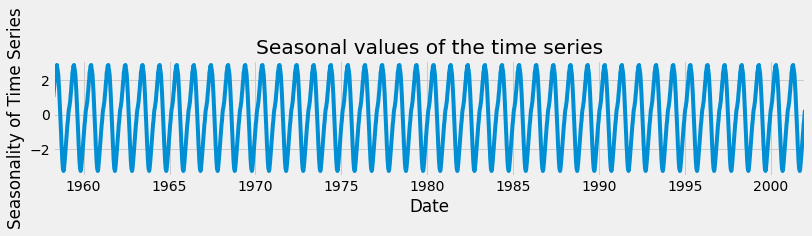

In [56]:
decom_seasonal = decomposition.seasonal

decom_seasonal.plot(figsize=(12,2))
plt.xlabel('Date')
plt.ylabel('Seasonality of Time Series')
plt.title('Seasonal values of the time series')
plt.show()

###Trend component in time series
This extracts the trend values of the time series decomposition. The trend component reflects the overall progression of the time series and can be extracted using the `decomposition.trend` command shown below.

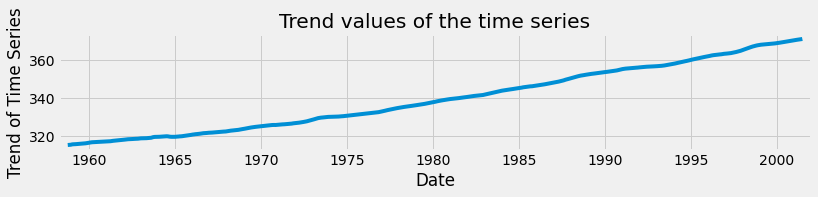

In [57]:
decom_trend = decomposition.trend

decom_trend.plot(figsize=(12, 2))

plt.xlabel('Date')
plt.ylabel('Trend of Time Series')
plt.title('Trend values of the time series')
plt.show()

###Noise component in time series
We can also extract the noise, or the residual component of a time series.

Noise/ Residual components describes random, irregular influences that could not be attributed to either trend or seasonality.

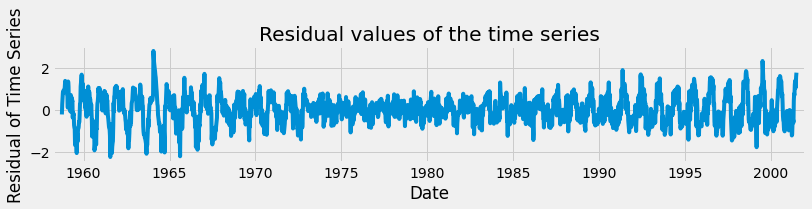

In [59]:
decom_resid = decomposition.resid

decom_resid.plot(figsize=(12,2))

plt.xlabel('Date')
plt.ylabel('Residual of Time Series')
plt.title('Residual values of the time series')

plt.show()

##Conclusion
In this jupyter notebook, we have learnt about autocorrelation and partial autocorrelation plots.

Also, learnt how to detect seasonality, trend and noise in time series data.